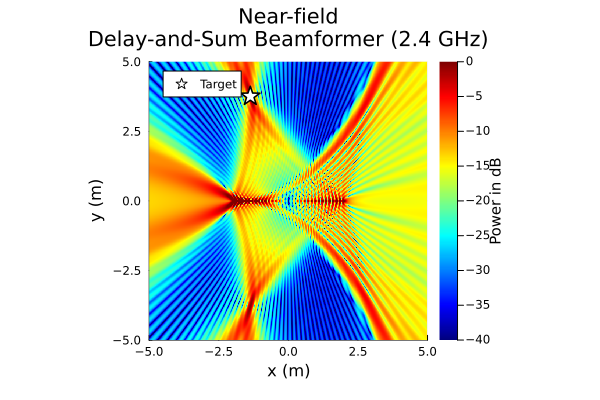

In [111]:
using ArraySignalProcessing
using LinearAlgebra
using Plots
import Measures

f0 = 2400e6
pa = IsotropicArray(LinRange(-2, 2, 32))

# Target near-field point
target_az = 110
target_coords = [4.0; deg2rad(target_az);;]

weights = dsb_weights(pa, target_coords, f0; coords = :RAzEl)

# XY scan region (meters)
xgrid = LinRange(-5, 5, 756)
ygrid = LinRange(-5, 5, 756)


n_points = length(xgrid) * length(ygrid)
coords = zeros(3, n_points)
idx = 1
for y in ygrid
    for x in xgrid
        r = sqrt(x^2 + y^2)
        if r ≈ 0
            r = 1e-9  # Small non-zero value
        end
        az = atan(y, x)  # azimuth from -π to π
        el = 0.0         # elevation (flat plane)
        
        # Store as column: [r; az; el]
        coords[1, idx] = r
        coords[2, idx] = az  
        coords[3, idx] = el
        idx += 1
    end
end

# Steering matrix for all points
A = steer(pa, coords, f0; coords = :RAzEl)

# Delay-nd-Sum response
pattern = vec(abs.(weights' * A))
pattern_dB = reshape(20 .* log10.(pattern),
                     length(xgrid), length(ygrid))

heatmap(xgrid, ygrid, pattern_dB';
    aspect_ratio = 1,
    color = :jet,
    clims = (-40, 0),
    xlims = (minimum(xgrid), maximum(xgrid)),
    ylims = (minimum(ygrid), maximum(ygrid)),
    xlabel = "x (m)",
    ylabel = "y (m)",
    title = "Near-field\nDelay-and-Sum Beamformer (2.4 GHz)",
    colorbar_title = "Power in dB",
    margin = 5*Measures.mm
)

target_x = target_coords[1, 1] * cosd(target_az)
target_y = target_coords[1, 1] * sind(target_az)
scatter!([target_x], [target_y], marker=:star, markersize=10, color=:white, 
         markerstrokecolor=:black, markerstrokewidth=2, label="Target")

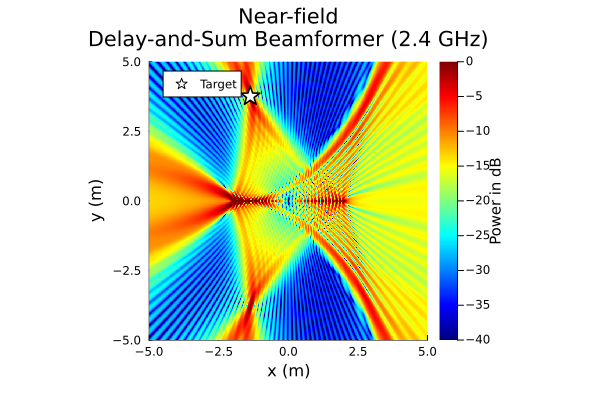

In [112]:
using CUDA

f0 = 2400e6
pa = IsotropicArray(cu(collect(LinRange(-2, 2, 32))))

# Target near-field point
target_az = 110
target_coords = [4.0; deg2rad(target_az);;]

weights = dsb_weights(pa, cu(target_coords), f0; coords = :RAzEl)

# XY scan region (meters)
xgrid = LinRange(-5, 5, 756)
ygrid = LinRange(-5, 5, 756)


n_points = length(xgrid) * length(ygrid)
coords = zeros(3, n_points)
idx = 1
for y in ygrid
    for x in xgrid
        r = sqrt(x^2 + y^2)
        if r ≈ 0
            r = 1e-9  # Small non-zero value
        end
        az = atan(y, x)  # azimuth from -π to π
        el = 0.0         # elevation (flat plane)
        
        # Store as column: [r; az; el]
        coords[1, idx] = r
        coords[2, idx] = az  
        coords[3, idx] = el
        idx += 1
    end
end

# Steering matrix for all points
A = steer(pa, cu(coords), f0; coords = :RAzEl)

# Delay-nd-Sum response
pattern = vec(abs.(weights' * A))
pattern_dB = reshape(20 .* log10.(pattern),
                     length(xgrid), length(ygrid))

heatmap(xgrid, ygrid, Array(pattern_dB');
    aspect_ratio = 1,
    color = :jet,
    clims = (-40, 0),
    xlims = (minimum(xgrid), maximum(xgrid)),
    ylims = (minimum(ygrid), maximum(ygrid)),
    xlabel = "x (m)",
    ylabel = "y (m)",
    title = "Near-field\nDelay-and-Sum Beamformer (2.4 GHz)",
    colorbar_title = "Power in dB",
    margin = 5*Measures.mm
)

target_x = target_coords[1, 1] * cosd(target_az)
target_y = target_coords[1, 1] * sind(target_az)
scatter!([target_x], [target_y], marker=:star, markersize=10, color=:white, 
         markerstrokecolor=:black, markerstrokewidth=2, label="Target")